# Chapter 3. 파이썬을 이용한 데이터 분석

## 3.5 표본 통계량 성질

### 3.5.3 라이브러리 임포트

In [3]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시자릿수 지정
%precision 3
# 그래프를 주피터노트북에 그리기 위한 설정
%matplotlib inline

In [8]:
# 평균 4、표준편차 0.8인 정규분포
population = stats.norm(loc = 4, scale = 0.8)

In [9]:
?stats.norm

### 3.5.4. 표본평균을 여러 번 계산하기

In [11]:
# 평균값 저장할 변수, sample_mean_array 초기화
sample_mean_array = np.zeros(10000)

In [22]:
# "데이터를 10 개 선택 평균을"시도를 10000 번 반복
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    sample_mean_array[i] = np.mean(sample)

In [23]:
sample_mean_array

array([3.922, 3.864, 4.07 , ..., 4.136, 4.575, 4.099])

### 3.5.5. 표본평균의 평균값은 모평균에 가깝다

In [24]:
# 표본 평균의 평균
np.mean(sample_mean_array)

4.004202422791747

In [25]:
# 표본 평균의 표준 편차
np.std(sample_mean_array, ddof = 1)

0.2513580850860402

c:\users\unf\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

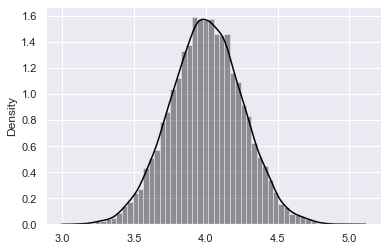

In [26]:
# 표본 평균의 분포
sns.distplot(sample_mean_array, color = 'black')

### 3.5.6. 샘플사이즈가 크면 표본평균은 모평균에 가까워진다

* 대상: 표본평균
* 변화시키는 것: 샘플사이즈
* 알고 싶은 것: 샘플사이즈가 커질수록 표본평균은 모평균에 가까워지는가?

In [27]:
# 샘플 크기를 10 ~ 100010까지의 범위에서 100단위로 변화
size_array =  np.arange(
    start = 10, stop = 100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [28]:
# 표본평균을 저장할 변수를 준비
sample_mean_array_size = np.zeros(len(size_array))

In [29]:
# 표본 평균을 구하는 시행을 샘플 크기를 바꿔 가며 여러 번 실행
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = np.mean(sample)

Text(0, 0.5, 'sample mean')

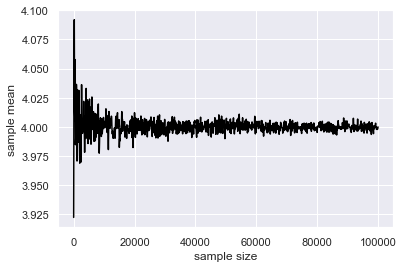

In [30]:
plt.plot(size_array, sample_mean_array_size, 
         color = 'black')
plt.xlabel("sample size")
plt.ylabel("sample mean")

[결론] 샘플사이즈가 커질수록 표본평균이 모평균(4)에 가까워진다

### 3.5.7. 표본평균을 몇 번이고 계산하는 함수 만들기

In [31]:
# 표본평균을 몇 번이고 계산하는 함수
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size = size)
        sample_mean_array[i] = np.mean(sample)
    return(sample_mean_array)

In [32]:
# 동작 확인.
# "데이터를 10 개 선택 평균을"시도를 10000 번 반복 한 결과를 또한 평균
np.random.seed(1)
np.mean(calc_sample_mean(size = 10, n_trial = 10000))

4.004202422791747

### 3.5.8. 샘플사이즈를 바꿨을 때 표본평균의 분산

In [35]:
np.random.seed(1)
# 샘플 사이즈 10
size_10 = calc_sample_mean(size = 10, n_trial = 10000)
size_10_df = pd.DataFrame({
    "sample_mean":size_10,
    "size"       :np.tile("size 10", 10000)
})
# 샘플 사이즈 20
size_20 = calc_sample_mean(size = 20, n_trial = 10000)
size_20_df = pd.DataFrame({
    "sample_mean":size_20,
    "size"       :np.tile("size 20", 10000)
})
# 샘플 사이즈 30
size_30 = calc_sample_mean(size = 30, n_trial = 10000)
size_30_df = pd.DataFrame({
    "sample_mean":size_30,
    "size"       :np.tile("size 30", 10000)
})

# 종합
sim_result = pd.concat(
    [size_10_df, size_20_df, size_30_df])

# 결과 표시
print(sim_result.head())

   sample_mean     size
0     3.922287  size 10
1     3.864329  size 10
2     4.069530  size 10
3     3.857140  size 10
4     4.184654  size 10


In [41]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [43]:
#컬럼명.str.contains(비교문자열)
#문자열에 tiger가 포함된 데이터를 찾습니다.

#컬럼명.str.startswith(비교문자열)
#특정 문자열로 시작하는 호랑이들을 찾습니다.

#컬럼명.str.endswith(비교문자열)
#특정 문자열로 끝나는 호랑이들을 찾습니다.

size_10 = sim_result.query( "size.str.contains('size 10')")
size_20 = sim_result.query( "size.str.contains('size 20')")

display_side_by_side(size_10, size_20)

,sample_mean,size
0,3.922287,size 10
1,3.864329,size 10
2,4.069530,size 10
3,3.857140,size 10
4,4.184654,size 10
5,4.141968,size 10
6,4.365342,size 10
7,3.911595,size 10
8,4.115923,size 10
9,4.051893,size 10


<AxesSubplot:xlabel='size', ylabel='sample_mean'>

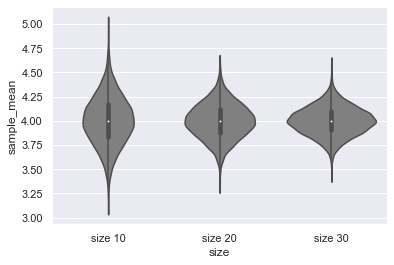

In [44]:
sns.violinplot(x = "size", y = "sample_mean", data = sim_result, color = 'gray')

[결론] 샘플사이즈가 커질수록 표본평균이 흩어지는 정도가 작아져서, 모평균(4)에 가깝게 모인다

### 3.5.9. 표본평균의 표준편차는 모집단보다 작다

* 대상: 표본평균의 표준편차
* 변화시키는 것: 샘플사이즈
* 알고싶은 것:
  * 샘플사이즈가 커질수록 표본평균의 표준편차는 작아진다 
  * 샘플사이즈가 커지면 표본평균은 보다 신뢰할 수 있는 값이 된다

In [45]:
# 샘플 크기를 2 ~ 100까지의 범위에서 2씩 변화
size_array =  np.arange(
    start = 2, stop = 102, step = 2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [46]:
# '표본 평균의 표준 편차'를 저장하는 변수 초기화
sample_mean_std_array = np.zeros(len(size_array))

In [47]:
# "표본 평균의 표준 편차를 계산하는"시도를 샘플 크기를 바꿔 가며 여러 번 실행
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size =size_array[i], n_trial = 100)
    sample_mean_std_array[i] = np.std(sample_mean, ddof = 1)

Text(0, 0.5, 'mean_std value')

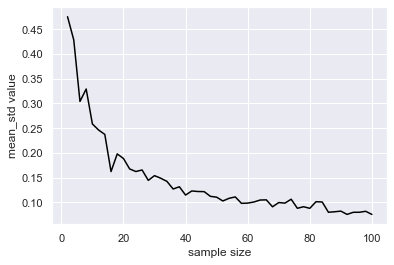

In [49]:
plt.plot(size_array, sample_mean_std_array, color = 'black')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

[결론] 샘플사이즈가 커질수록 표본평균의 표준편차가 작아지는 것을 알 수 있다

### 3.5.10. 표준오차

* 표준 오차(Standard Error, SE): 표본평균의 표준편차
* 표준오차 = 표준편차 / sqrt(샘플사이즈)  
(참고)sqrt : 루트 연산 

* 샘플사이즈가 커지면 표준오차가 작아짐

In [55]:
# 표준오차
standard_error = 0.8 / np.sqrt(size_array)
standard_error

array([0.566, 0.4  , 0.327, 0.283, 0.253, 0.231, 0.214, 0.2  , 0.189,
       0.179, 0.171, 0.163, 0.157, 0.151, 0.146, 0.141, 0.137, 0.133,
       0.13 , 0.126, 0.123, 0.121, 0.118, 0.115, 0.113, 0.111, 0.109,
       0.107, 0.105, 0.103, 0.102, 0.1  , 0.098, 0.097, 0.096, 0.094,
       0.093, 0.092, 0.091, 0.089, 0.088, 0.087, 0.086, 0.085, 0.084,
       0.083, 0.083, 0.082, 0.081, 0.08 ])

Text(0, 0.5, 'mean_std value')

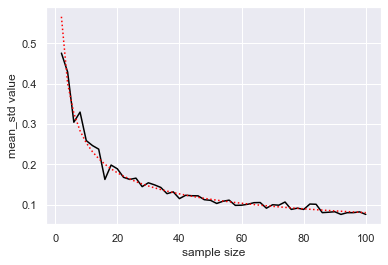

In [58]:
#표준오차: linestyle = 'dotted'
plt.plot(size_array, sample_mean_std_array, color = 'black')
plt.plot(size_array, standard_error, color = 'red', linestyle = 'dotted')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

[결론] 시뮬레이션의 결과와 표준오차의 값이 거의 일치

### 3.5.12. 표본분산의 평균값은 모분산과 차이가 있다


In [59]:
# 표본분산을 저장할 변수 초기화
sample_var_array = np.zeros(10000)

In [60]:
# 데이터를 10개를 선택해서 표본분산을 구하는 시도를 10000 번 반복
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    sample_var_array[i] = np.var(sample, ddof = 0)

In [61]:
# 표본분산의 평균값
np.mean(sample_var_array)

0.5746886877332101

* 모분산: 0.64
* 표본분산의 평균값: 0.575
* 결론: 분산이 과소평가됨

### 3.5.13. 불편분산을 사용하면 편향이 사라진다

In [62]:
# 불편분산을 저장하는 변수
unbias_var_array = np.zeros(10000)
# 데이터를 10개를 선택해서 불편분산를 구하는 시행을
# 10000 회 반복
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    unbias_var_array[i] = np.var(sample, ddof = 1)
# 불편분산의 평균값
np.mean(unbias_var_array)

0.6385429863702334

[결론] 불편분산의 평균값은 모분산이라고 간주해도 좋음

### 3.5.14. 샘플사이즈가 크면 불편분산은 모분산에 가까워진다

* 대상: 불편분산
* 변화시키는 것: 샘플사이즈
* 알고 싶은 것: 샘플사이즈가 커지면 불편분산은 모분산에 가까워진다

In [63]:
# 샘플: 10~100100까지 100단위로 변화
size_array =  np.arange(
    start = 10, stop = 100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [64]:
# 불편분산을 저장하는 변수
unbias_var_array_size = np.zeros(len(size_array))

In [65]:
# 불편분산을 구하는 시행을 샘플사이즈를 변화시켜가면서 몇 번이고 시행
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    unbias_var_array_size[i] = np.var(sample, ddof = 1)

Text(0, 0.5, 'unbias var')

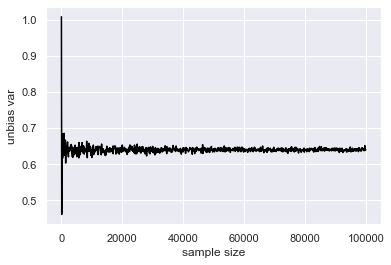

In [66]:
plt.plot(size_array, unbias_var_array_size, color = 'black')
plt.xlabel("sample size")
plt.ylabel("unbias var")

[결론] 샘플사이즈가 커질수록 불편분산은 모분산(0.64)에 가까워지는 것을 알 수 있다

### 3.5.19. 중심극한정리


모집단분포가 무엇이든 간에 샘플사이즈가 커지면 확률변수의 합은 정규분포에 가까워진다

c:\users\unf\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

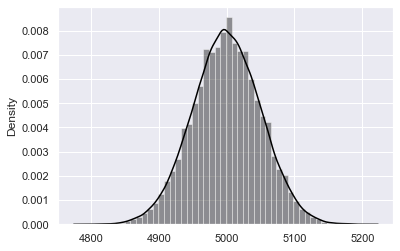

In [68]:
# 샘플사이즈와 시행 횟수
n_size  = 10000
n_trial = 50000
# 앞면이면 1, 뒷면이면 0
coin = np.array([0,1])
# 앞면이 나온 횟수
count_coin = np.zeros(n_trial)
# 동전을 n_size번 던지는 시행을 n_trial번 수행
np.random.seed(1)
for i in range(0, n_trial):
    count_coin[i] = np.sum(np.random.choice(coin, size = n_size, replace = True))
# 히스토그램 그리기
sns.distplot(count_coin, color = 'black')

    * 중심극한정리는 평균값 등의 추정값을 처음 구할 때 사용
    * 모집단분포가 정규분포가 아닌 경우에는 일반선형모델 등을 사용

# [정리]

#### 평균
1) 표본평균의 평균값은 모평균에 가깝다  
2) 샘플사이즈가 크면 표본평균은 모평균에 가까워진다

#### 표준편차, 분산
3) 표본평균의 표준편차는 모집단의 표준편차보다 작다  
4) 표본분산의 평균값은 모분산과 차이가 있다  
5) 불편분산을 사용하면 편향이 사라진다


#### 표준오차: 표본평균의 표준편차
 샘플사이즈가 커지면 표준오차가 작아짐